# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


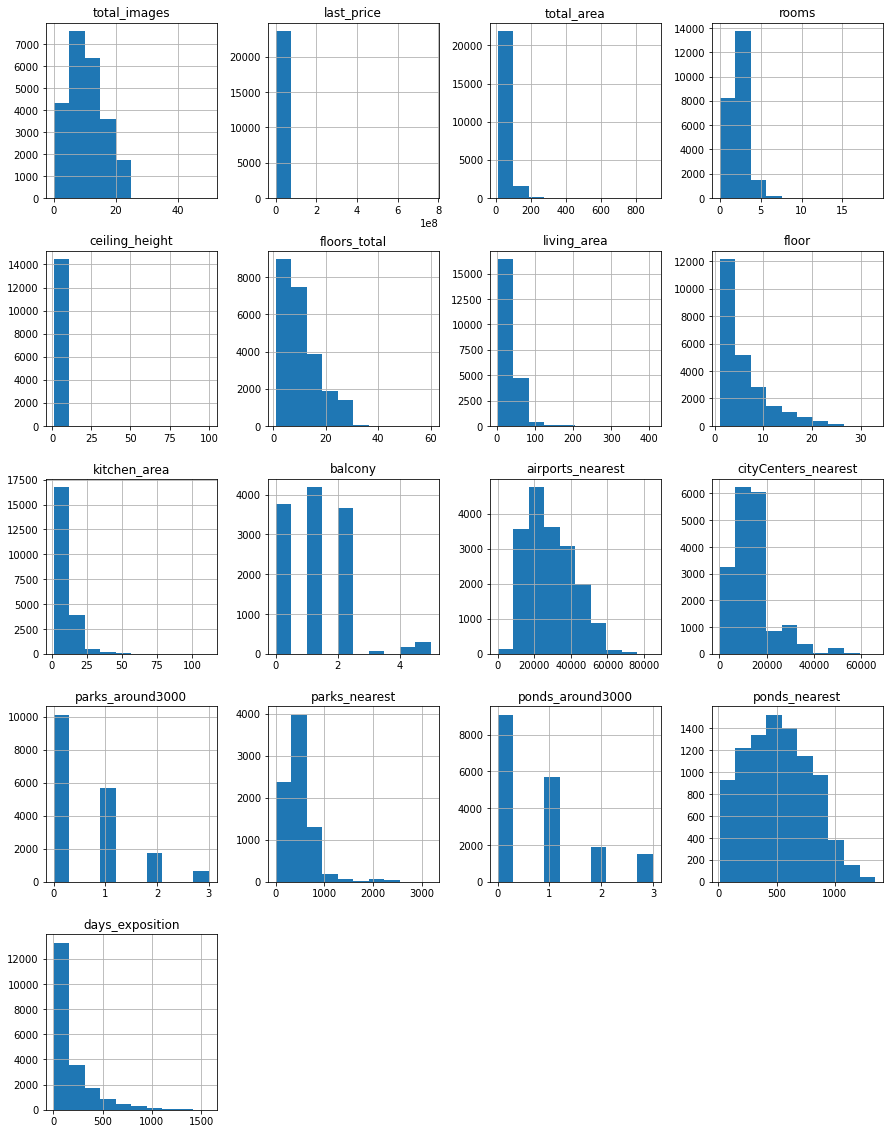

In [2]:
data.hist(bins=10,figsize=(15, 20));#поправил

### Предобработка данных

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

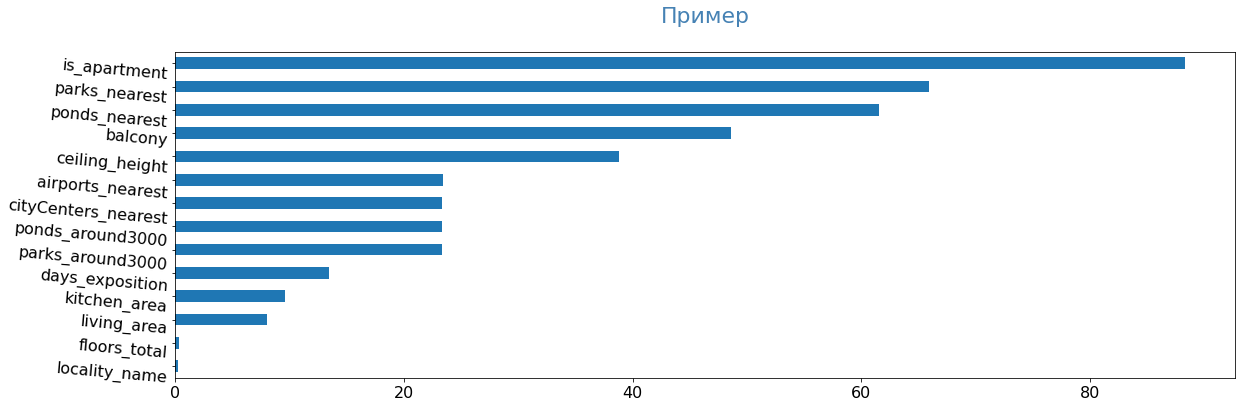

In [5]:
pass_value_barh(data)

In [6]:
data['balcony'] = data['balcony'].fillna(0)# заменяем пустые значения балконов на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)# заменяем пустые значения число парков в радиусе 3 км на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)# число водоёмов в радиусе 3 км на 0
data['is_apartment'] = data['is_apartment'].fillna(False)# заменяем пустые значения апартаменты (булев тип) на нет
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)#удаляем записи без этажности и названия населённого пункта
data.isna().sum()#проверяем

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски в balcony,living_area,kitchen_area,is_apartment- не заполнены пользователями.
Критичными для анализа являются пропуски в locality_name и floors_total.
Картографические пропуски скорее всего связаны с указанием неполных геолокаций.


In [7]:
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)#заменил пустые значения по плоащди кухни на среднее по отношению к общей площади.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [10]:
data['last_price'] = data['last_price'].astype(int)#переводим цену квартир в количественное значение
data['balcony'] = data['balcony'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')#дату в более читабельный формат
data['floors_total'] = data['floors_total'].astype(int)#этажи также к цельным числам
data.rename(columns={'cityCenters_nearest' : 'citycenters_nearest'}, inplace=True)#меняем название столбца на "хороший" тон
data.head(5)#проверяем


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,27.836861,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Цена и этажи стали более наглядными значениями,как и дата.
В дальнейшем нам это пригодится)

In [11]:
data.duplicated().sum()#проверяем явные дубликаты


0

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')#меняем неявные дубликаты с Ё на Е
data['locality_name'].unique()#проверяем(поселок и поселок городского типа разные типы поселений,
#делаю допущение что в Ленинградской области может быть ПГТ Рябово и пос Рябово )

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [14]:
# check
data.locality_name.nunique()

330

In [15]:
data.describe()#смотрим значения 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.499898,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,6.037750,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Изучаем потолки.

In [16]:
print('потолки от 0 до 2м: ' + str(data.query('ceiling_height > 0 and ceiling_height < 2')['ceiling_height'].count()) + ' шт.')
print('потолки от 4 до 20м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 20')['ceiling_height'].count()) + ' шт.')
print('потолки от 20м до 39м: ' + str(data.query('ceiling_height >= 20 and ceiling_height <= 39')['ceiling_height'].count()) + ' шт.')
print('потолки от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()) + ' шт.')

потолки от 0 до 2м: 3 шт.
потолки от 4 до 20м: 13 шт.
потолки от 20м до 39м: 22 шт.
потолки от 50м: 1 шт.


Допустим,что нормальная высота потолков от 2 до 4 метров,а значения от 20  до 39 метров это опечатки.
Значит нам нужно удалить все значения от 0-2 метров,от 4 до 20 метров и более 39 метров.
Для квартир с высотой потолков до 20 до 39 метров предполагаем делим на 10.
Затем проверяем.

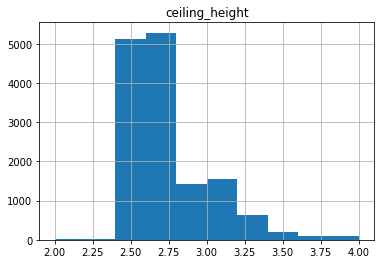

In [17]:
data.drop(data.query('ceiling_height > 0 and ceiling_height < 2').index,inplace=True)
data.drop(data.query('ceiling_height > 4 and ceiling_height < 20').index,inplace=True)
data.drop(data.query('ceiling_height > 39').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 39)]['ceiling_height']/10)
data.hist('ceiling_height');

Изучаем общую площадь.

In [18]:
print('площадь метров до 10 м - ' + str(data.query('total_area > 0 and total_area < 10')['total_area'].count()) + ' шт.')
print('площадь метров больше 400 м - ' + str(data.query('total_area > 400')['total_area'].count()) + ' шт.')

площадь метров до 10 м - 0 шт.
площадь метров больше 400 м - 20 шт.


Посмотрим сколько квартир менее 10 метров и более 400 метров.
Будем считать данные значения выбросами.

In [19]:
data.drop(data.query('total_area > 400' ).index,inplace=True)


Остальные столбы выглядят адекватно на первый взляд.

#### check gap

In [20]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23489 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23489 non-null  int64         
 1   last_price            23489 non-null  int64         
 2   total_area            23489 non-null  float64       
 3   first_day_exposition  23489 non-null  datetime64[ns]
 4   rooms                 23489 non-null  int64         
 5   ceiling_height        14412 non-null  float64       
 6   floors_total          23489 non-null  int64         
 7   living_area           21636 non-null  float64       
 8   floor                 23489 non-null  int64         
 9   is_apartment          23489 non-null  bool          
 10  studio                23489 non-null  bool          
 11  open_plan             23489 non-null  bool          
 12  kitchen_area          23489 non-null  float64       
 13  balcony         

In [21]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,489.00","23,489.00","14,412.00","20,331.00","23,489.00","21,636.00","23,489.00","23,489.00","23,489.00"
min,0.00,12.00,2.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,400.00,4.00,"1,580.00","763,000,000.00",264.50,107.00,33.00,60.00


In [22]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [23]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


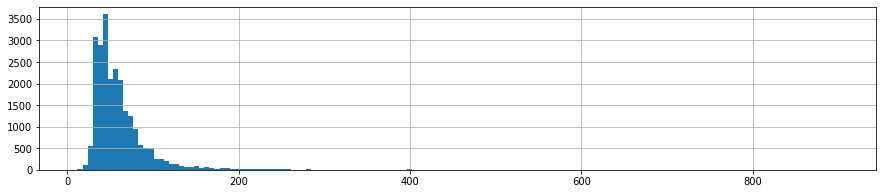

In [24]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

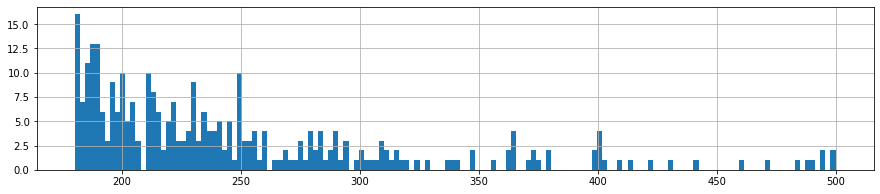

In [25]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

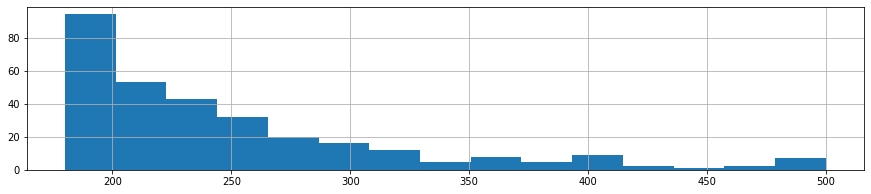

In [26]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

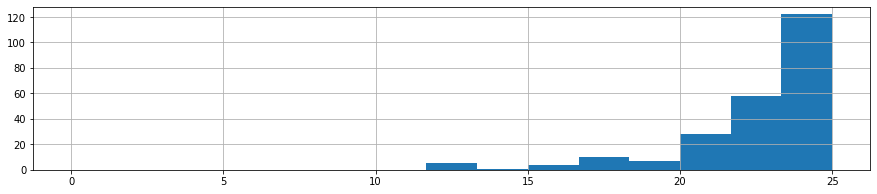

In [27]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [28]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.30,3.00,"567,784.00",10.00,3.02,1.00,2.00
0.01,1.00,25.33,2.50,4.00,"1,000,000.00",13.00,4.38,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,5.00,188.82,3.63,"1,066.70","34,037,800.00",114.77,35.00,23.00,26.00
0.9988,7.81,312.81,4.00,"1,371.02","94,072,000.00",187.03,58.33,26.00,34.81


### Посчитайте и добавьте в таблицу новые столбцы

In [29]:
data['price_once_m'] = data['last_price'] / data['total_area']#добавляем столбец цены на 1 метр 
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek#добавляем столбец дня недели
data['month'] = data['first_day_exposition'].dt.month#месяца
data['year'] = data['first_day_exposition'].dt.year#года
data.head(5)#проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_once_m,dayofweek,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


In [30]:
 def categorize_floor(row):#задаем функцию по двум столбцам      
    
    floors_total = row['floors_total']
    floor_real = row['floor']
    
    if floor_real == 1:
        return 'первый'
    
    if floor_real == floors_total:
        return 'последний'
    
    return 'другой'
 
 


In [31]:
data['floor_category'] = data.apply(categorize_floor, axis = 1)#применяем функию на весь датафрейм
data['floor_category'].value_counts()#проверяем

другой       17289
последний     3297
первый        2903
Name: floor_category, dtype: int64

In [32]:
data['citycenters_nearest'] = pd.to_numeric(data['citycenters_nearest'])#преобразуем столбец для возможности деления
data['citycenters_nearest_km'] = round(data['citycenters_nearest'] / 1000)#переводим в КМ
data.head(5)#проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_once_m,dayofweek,month,year,floor_category,citycenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

### Общая площадь

In [33]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_once_m,dayofweek,month,year,citycenters_nearest_km
count,23489.000000,2.348900e+04,23489.000000,23489.000000,14412.000000,23489.000000,21636.000000,23489.000000,23489.000000,23489.000000,...,23489.000000,7988.000000,23489.000000,8989.000000,20331.000000,2.348900e+04,23489.000000,23489.000000,23489.000000,17995.000000
mean,9.871727,6.382723e+06,59.766634,2.064924,2.720092,10.686534,34.195967,5.879475,10.445134,0.594023,...,0.467325,490.653230,0.587807,518.771276,180.472038,9.909397e+04,2.567074,6.400230,2017.371621,14.214337
std,5.677771,9.450561e+06,32.313812,1.065746,0.257424,6.594229,20.696528,4.871955,5.813605,0.960489,...,0.746905,341.977516,0.882175,278.102480,219.479479,4.918434e+04,1.788533,3.492575,1.037264,8.618024
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,7.653061e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,454.000000,0.000000,503.000000,95.000000,9.491870e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.750000e+06,69.400000,3.000000,2.800000,16.000000,42.200000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,731.000000,231.000000,1.140625e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,400.000000,19.000000,4.000000,60.000000,264.500000,33.000000,107.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


Квартир площадью менее 20 кв.м.: 27
Квартир площадью более 250 кв.м.: 82


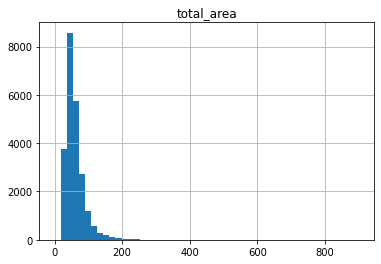

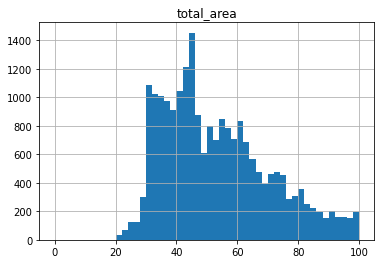

In [34]:
print('Квартир площадью менее 20 кв.м.:',data.query('total_area < 20')['total_area'].count()) 
print('Квартир площадью более 250 кв.м.:',data.query('total_area > 250')['total_area'].count())

data.drop(index=data.query('total_area > 250').index,inplace=True)
data.drop(index=data.query('total_area < 20').index,inplace=True)

data.hist('total_area', bins=50, range=(0,900));
data.hist('total_area', bins=50, range=(0,100));


Основная масса квартир с площадью до 100 квадратных метров(около 50 метров),что ожидаемо.
Отбросим выбивающиеся значения площади до 20 и более 250.

### Жилая площадь

Видим,что есть значения 2 метра(скорее всего опечатка).Выкинем значения менее 10 метров квадратных больше 120.

Жилая площадь меньше 10 кв.м.:  24
Жилая площадь больше общей:  0
Жилая площадь больше 200:  1


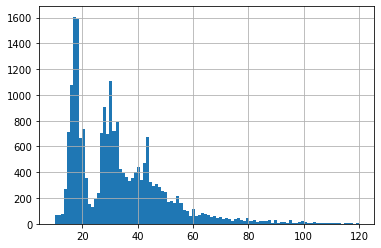

In [35]:
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('Жилая площадь больше 200: ',data.query('living_area > 200')['living_area'].count())
data.drop(data.query('living_area < 10').index,inplace=True)
data.drop(data.query('living_area > 120').index,inplace=True)
data['living_area'].hist(bins=100);

Основная масса квартир жилой лощадью до 60 квадратных метров,что вполне логично.

### Площадь кухни

Площадь кухни меньше 4 кв.м.:  59
Площадь кухни больше 58 кв.м.:  18
Площадь кухни больше общей:  0


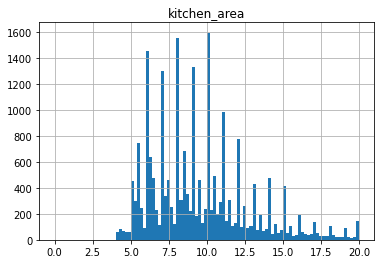

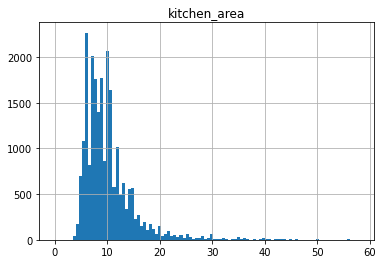

In [36]:
print('Площадь кухни меньше 4 кв.м.: ',data.query('kitchen_area < 4')['living_area'].count())
print('Площадь кухни больше 58 кв.м.: ',data.query('kitchen_area > 58')['living_area'].count())
print('Площадь кухни больше общей: ',data.query('kitchen_area > total_area')['living_area'].count())

data.drop(data.query('kitchen_area < 4').index,inplace=True)
data.drop(data.query('kitchen_area > 58').index,inplace=True)

data.hist('kitchen_area', bins=100,range=(0,20));
data.hist('kitchen_area', bins=100, range=(0,58));

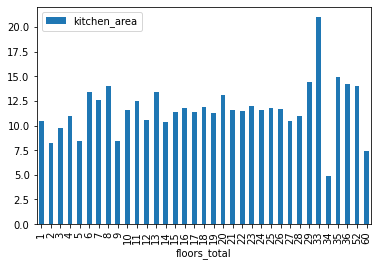

In [37]:
data.pivot_table(index='floors_total',values='kitchen_area').plot(y='kitchen_area', kind='bar');

Нулевых значений нет.Кухня с площадью 1.3 м для квартиры с общей площадью в 12 м звучит логично,но выкинем для корректности выборки.
Кухни более 58 м малы в количестве,также выбросим.
Выбросы по определенным площадям связаны с типовой застройкой в малоэтажных зданиях.

In [38]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_once_m,dayofweek,month,year,citycenters_nearest_km
count,23142.000000,2.314200e+04,23142.000000,23142.000000,14201.000000,23142.000000,21317.000000,23142.000000,23142.000000,23142.000000,...,23142.000000,7801.000000,23142.000000,8781.000000,20048.000000,2.314200e+04,23142.000000,23142.000000,23142.00000,17694.000000
mean,9.865051,5.993176e+06,58.164708,2.034785,2.713401,10.721718,33.125219,5.889335,10.260874,0.597312,...,0.459900,492.157928,0.580373,520.678283,179.516211,9.808952e+04,2.567583,6.402601,2017.37473,14.321352
std,5.665287,6.083619e+06,26.390633,0.983486,0.248340,6.596430,16.768508,4.878426,5.110901,0.962733,...,0.738547,342.753049,0.876103,277.614211,218.245867,4.466706e+04,1.788693,3.492267,1.03565,8.601296
min,0.000000,1.219000e+04,20.000000,0.000000,2.000000,1.000000,10.000000,1.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.00000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,298.000000,45.000000,7.629519e+04,1.000000,3.000000,2017.00000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,456.000000,0.000000,505.000000,95.000000,9.474451e+04,3.000000,6.000000,2017.00000,13.000000
75%,14.000000,6.690000e+06,68.700000,3.000000,2.800000,16.000000,42.000000,8.000000,11.800000,1.000000,...,1.000000,613.000000,1.000000,733.000000,229.000000,1.136909e+05,4.000000,10.000000,2018.00000,16.000000
max,50.000000,3.300000e+08,250.000000,9.000000,4.000000,60.000000,120.000000,33.000000,58.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.00000,66.000000


### Цена объекта

In [39]:
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())
print('Квартир стоимостью меньше 100.000:', data.query('last_price < 100000')['last_price'].count())
data.drop(data.query('last_price > 100000000').index,inplace=True)
data.drop(data.query('last_price < 100000').index,inplace=True)

Квартир стоимостью больше 100.000.000: 4
Квартир стоимостью меньше 100.000: 1


Как видим выше квартир со стоимостью 0 нет,уберем квартиру до 100 000(скорее всего опечатка или ошибка).

16590    98000000
12045    86738800
11430    85000000
10362    83820000
6462     82000000
22804    81960000
6813     79000000
5232     77612080
15726    77349000
14496    77000000
Name: last_price, dtype: int64

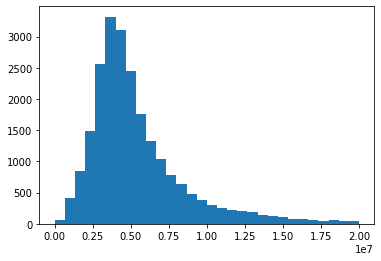

In [40]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
data['last_price'].sort_values(ascending=False).head(10)#посмотрим наибольшие стоимости

По графику видим,что наибольшее количество квартир стоимостью до 10млн,что вполне логично.

### Количество комнат

Квартиры с более 7 комнат: 3


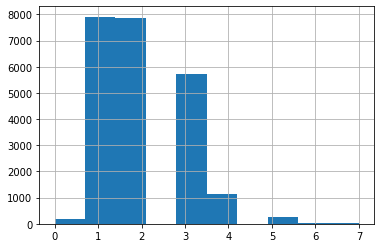

In [41]:
print('Квартиры с более 7 комнат:',data.query('rooms > 7')['rooms'].count())#посчитаем квартиры с более 7 комнат
data.drop(data.query('rooms > 7').index,inplace=True)

data['rooms'].hist(bins=10);


Есть квартиры с 0 комнат,что скорее всего означает квартиры-студии.
Есть и 19 комнат,скорее всего для элитного жилья,их мало выкинем.
Наибольшее 1-2 комнатных квартир.


### Высота потоков

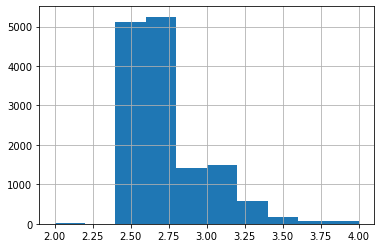

In [42]:
data['ceiling_height'].hist(bins=10);

Ранее с этим столбцом провели работу.Основная масса в пределах стандартной высоты потолков.

### Этаж квартиры

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_once_m,dayofweek,month,year,citycenters_nearest_km
count,23134.000000,2.313400e+04,23134.000000,23134.000000,14193.000000,23134.000000,21311.000000,23134.000000,23134.000000,23134.000000,...,23134.000000,7793.000000,23134.000000,8776.000000,20042.000000,23134.000000,23134.000000,23134.000000,23134.000000,17686.000000
mean,9.863707,5.954679e+06,58.123086,2.033717,2.713209,10.722659,33.111989,5.889340,10.254643,0.597519,...,0.459324,492.171564,0.579969,520.874316,179.525546,97900.730640,2.567649,6.402524,2017.374643,14.326247
std,5.664984,5.254969e+06,26.286913,0.980722,0.248215,6.596276,16.745356,4.877316,5.093560,0.962835,...,0.737823,342.894708,0.875601,277.567397,218.265879,41762.655366,1.788806,3.492411,1.035570,8.599977
min,0.000000,4.300000e+05,20.000000,0.000000,2.000000,1.000000,10.000000,1.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,298.000000,45.000000,76295.189612,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,456.000000,0.000000,505.000000,95.000000,94736.842105,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.680000e+06,68.690000,3.000000,2.800000,16.000000,42.000000,8.000000,11.800000,1.000000,...,1.000000,613.000000,1.000000,733.000000,229.000000,113681.109646,4.000000,10.000000,2018.000000,16.000000
max,50.000000,9.800000e+07,250.000000,7.000000,4.000000,60.000000,120.000000,33.000000,58.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,848484.848485,6.000000,12.000000,2019.000000,66.000000


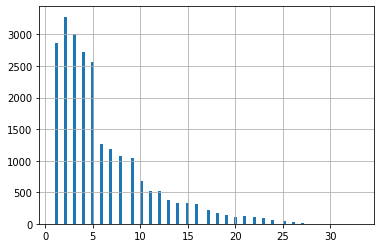

In [43]:
data['floor'].hist(bins=100);
data.describe()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23134 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23134 non-null  int64         
 1   last_price              23134 non-null  int64         
 2   total_area              23134 non-null  float64       
 3   first_day_exposition    23134 non-null  datetime64[ns]
 4   rooms                   23134 non-null  int64         
 5   ceiling_height          14193 non-null  float64       
 6   floors_total            23134 non-null  int64         
 7   living_area             21311 non-null  float64       
 8   floor                   23134 non-null  int64         
 9   is_apartment            23134 non-null  bool          
 10  studio                  23134 non-null  bool          
 11  open_plan               23134 non-null  bool          
 12  kitchen_area            23134 non-null  float6

0 этажа нет.
Основная масса до 5 этажа аключительно,что соответствует старым пятиэтажкам и старому жилому фонду.

### Тип этажа квартиры («первый», «последний», «другой»)

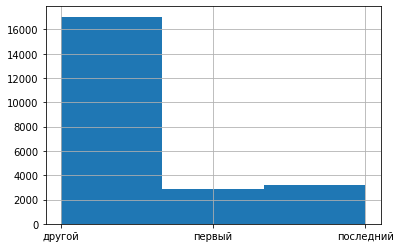

In [45]:
data['floor_category'].hist(bins=3);

Здесь также все соответствует ожиданиям,других больше чем первого и последнего.


### Общее количество этажей в доме

Дома свыше 25 этажей: 337
Дома менее 1 этажа: 0


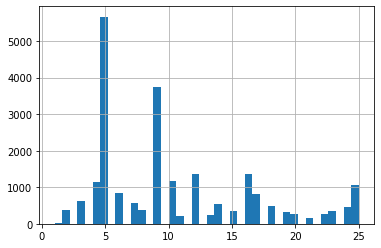

In [46]:
print('Дома свыше 25 этажей:',data.query('floors_total > 25')['rooms'].count())
print('Дома менее 1 этажа:',data.query('floors_total < 1')['rooms'].count())
data.drop(data.query('floors_total > 25').index,inplace=True)
data['floors_total'].hist(bins=40);

Большинство домов "пятиэтажек" согласно выгрузке выше,далее 9 этажки.
Убрали дома с этажностью свыше 25 этажей.

### Время продажи

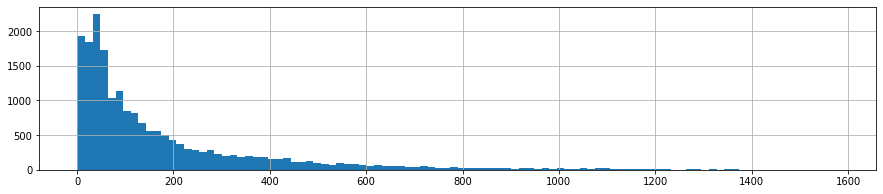

In [47]:
# check
data['days_exposition'].hist(bins=100, figsize=(15,3));

Время продажи менее 3 дней: 4
Время продажи более 1200 дней: 84
Время продажи 45 дней: 0


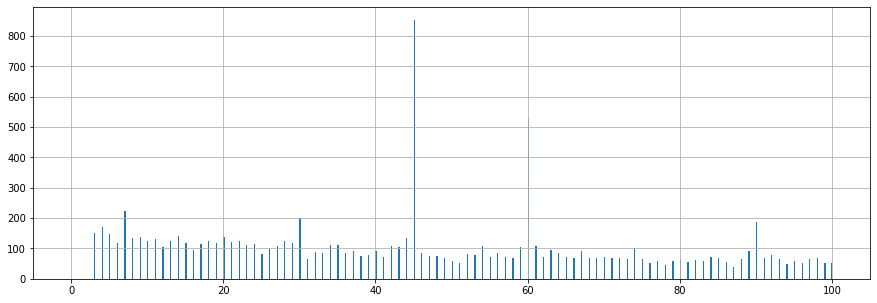

In [48]:
print('Время продажи менее 3 дней:',data.query('days_exposition < 3')['days_exposition'].count())
print('Время продажи более 1200 дней:',data.query('days_exposition > 1200')['days_exposition'].count())
print('Время продажи 45 дней:',data.query('days_exposition == 45')['days_exposition'].count())

data.drop(data.query('days_exposition < 3').index,inplace=True)
data.drop(data.query('days_exposition > 1200').index,inplace=True)
data['days_exposition'].hist(bins=600,range=(0,100),figsize=(15,5));


In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22709 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22709 non-null  int64         
 1   last_price              22709 non-null  int64         
 2   total_area              22709 non-null  float64       
 3   first_day_exposition    22709 non-null  datetime64[ns]
 4   rooms                   22709 non-null  int64         
 5   ceiling_height          13983 non-null  float64       
 6   floors_total            22709 non-null  int64         
 7   living_area             20915 non-null  float64       
 8   floor                   22709 non-null  int64         
 9   is_apartment            22709 non-null  bool          
 10  studio                  22709 non-null  bool          
 11  open_plan               22709 non-null  bool          
 12  kitchen_area            22709 non-null  float6

In [50]:
data['days_exposition'].agg(['mean','median'])

mean      174.961085
median     94.000000
Name: days_exposition, dtype: float64

Отбросили очень быстрые продажи и очень долгие.
Есть выброс на 45 дне продажи,скорее всего связан с окончанием "платного"объявления и снятия.
Среднее время продажи 86 дней.

### Расстояние до центра города в метрах

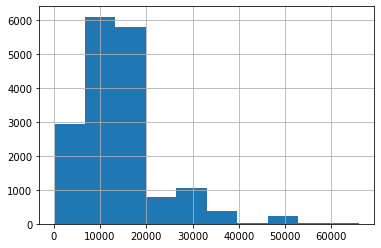

In [51]:
data['citycenters_nearest'].hist(bins=10);

Есть нулевые значения,связанные с незаполненной информацией пользователями.
Основная масса от 8 до 20 тыс.метров.

### Расстояние до ближайшего аэропорта

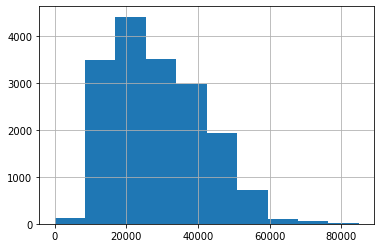

In [52]:
data['airports_nearest'].hist(bins=10);

Есть нулевые значения,связанные с незаполненной информацией пользователями.
Основная масса в 18-25 тыс.метров от аэропорта.

### Расстояние до ближайшего парка

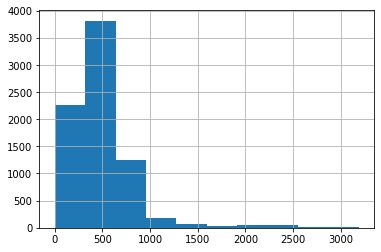

In [53]:
data['parks_nearest'].hist(bins=10);

Есть нулевые значения,связанные с незаполненной информацией пользователями.
Основная масса квартир недалко от парков.

### День и месяц публикации объявления

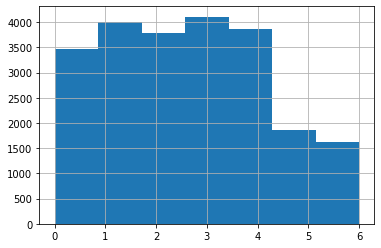

In [54]:
data['dayofweek'].hist(bins=7);


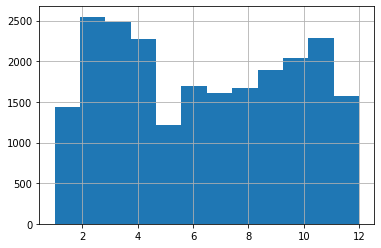

In [55]:
data['month'].hist(bins=12);

Видим провал в публикации объявлений в субботу и воскресенье, что логично. Так же видим что с февраля по апрель наблюдалосась повышенная активность. Так же был рост активности с июля по ноябрь. Провалы в декабре, январе и мае.

In [56]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,709.00","22,709.00","13,983.00","19,658.00","22,709.00","20,915.00","22,709.00","22,709.00","22,709.00"
min,0.00,20.00,2.00,3.00,"430,000.00",10.00,4.00,1.00,1.00
max,7.00,250.00,4.00,"1,200.00","98,000,000.00",120.00,58.00,25.00,25.00


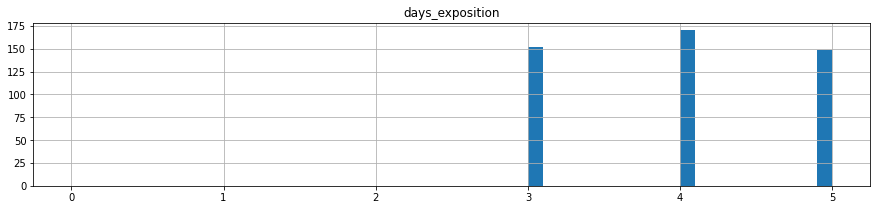

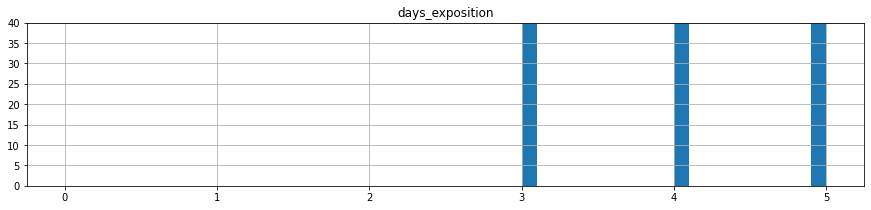

In [57]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

### Изучаем, как быстро продавались квартиры 

In [58]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_once_m,dayofweek,month,year,citycenters_nearest_km
count,22709.000000,2.270900e+04,22709.000000,22709.000000,13983.000000,22709.000000,20915.000000,22709.000000,22709.000000,22709.000000,...,22709.000000,7724.000000,22709.000000,8630.000000,19658.000000,22709.000000,22709.000000,22709.000000,22709.000000,17360.000000
mean,9.884011,5.956703e+06,58.180240,2.040204,2.712917,10.477212,33.207696,5.749086,10.230501,0.595006,...,0.463649,491.261005,0.579110,522.302317,174.961085,97789.950457,2.570479,6.398608,2017.383064,14.281164
std,5.667535,5.274415e+06,26.309779,0.980843,0.248749,6.304650,16.749471,4.674504,5.103183,0.962899,...,0.739534,341.120731,0.872715,277.204439,205.889807,41918.796620,1.789333,3.493406,1.026141,8.629513
min,0.000000,4.300000e+05,20.000000,0.000000,2.000000,1.000000,10.000000,1.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,3.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.700000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,300.000000,44.000000,76000.000000,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,0.000000,507.000000,94.000000,94642.857143,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.685000e+06,68.700000,3.000000,2.800000,15.000000,42.000000,8.000000,11.700000,1.000000,...,1.000000,613.000000,1.000000,733.000000,226.000000,113636.363636,4.000000,10.000000,2018.000000,16.000000
max,50.000000,9.800000e+07,250.000000,7.000000,4.000000,25.000000,120.000000,25.000000,58.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1200.000000,848484.848485,6.000000,12.000000,2019.000000,66.000000


Среднее время продажи квартиры в днях: 174
Медианное время продажи квартиры в днях: 94


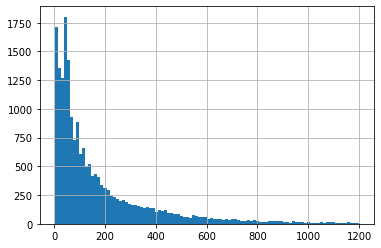

In [59]:
data['days_exposition'].hist(bins=100)
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

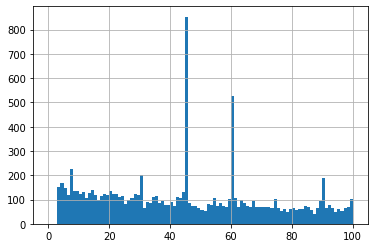

In [60]:
data['days_exposition'].hist(bins=100,range=(0,100));

Среднее время завышено из-за наличия очень долгих продаж квартир.
Медианное значение ближе к "обычному"сроку продажи квартиры.
Быстрыми продажами я бы назвал срок до 40 дней,долгими свыше 100 дней.

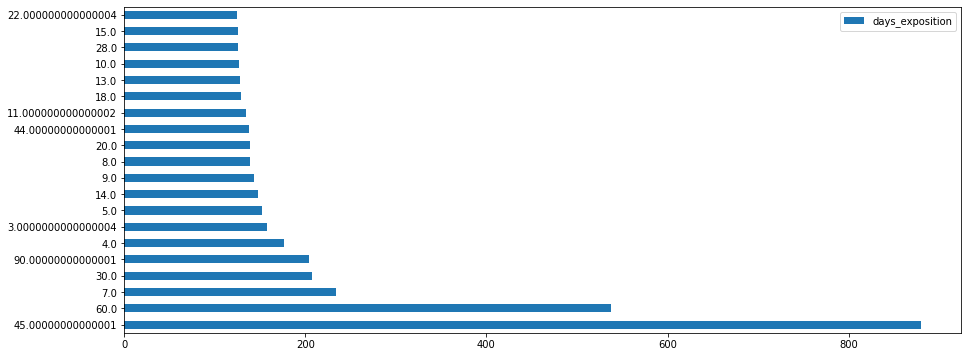

In [61]:
# check
# Моды на реальных данных

df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22709 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22709 non-null  int64         
 1   last_price              22709 non-null  int64         
 2   total_area              22709 non-null  float64       
 3   first_day_exposition    22709 non-null  datetime64[ns]
 4   rooms                   22709 non-null  int64         
 5   ceiling_height          13983 non-null  float64       
 6   floors_total            22709 non-null  int64         
 7   living_area             20915 non-null  float64       
 8   floor                   22709 non-null  int64         
 9   is_apartment            22709 non-null  bool          
 10  studio                  22709 non-null  bool          
 11  open_plan               22709 non-null  bool          
 12  kitchen_area            22709 non-null  float6

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [63]:
list_match = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms']
                              

for i in list_match:
    correlation = data['last_price'].corr(data[i])
    print(f'Корреляция между last_price и {i} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 73.35%
Корреляция между last_price и living_area составляет: 62.30%
Корреляция между last_price и kitchen_area составляет: 57.71%
Корреляция между last_price и rooms составляет: 43.13%


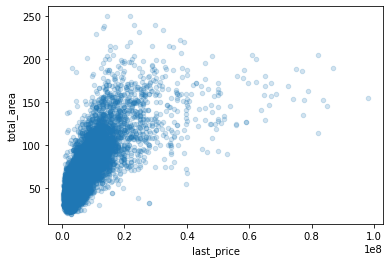

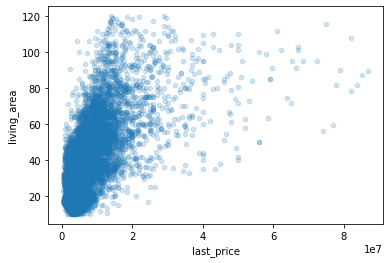

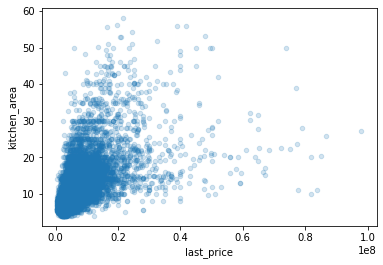

In [64]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2);


Видим высокую корреляцию отношения цены к общей плоащди,площади кухни и жилой.

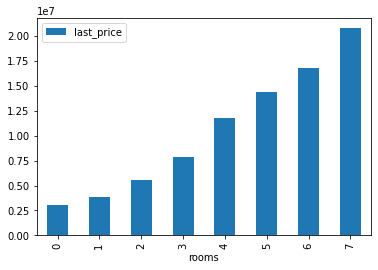

In [65]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

Чем больше комнат,тем выше стоимость.

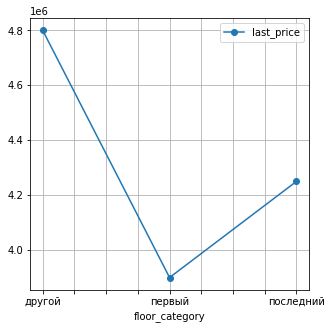

In [66]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Этажи кроме первого и последнего закономерно стоят дороже.
Первый этаж более всего будет влиять на цену.

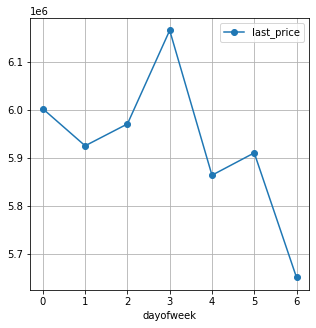

In [67]:
(
    data.pivot_table(index='dayofweek', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Дороже всего квартиры опубликованные в четверг.
Самые дешевые в воскресенье.

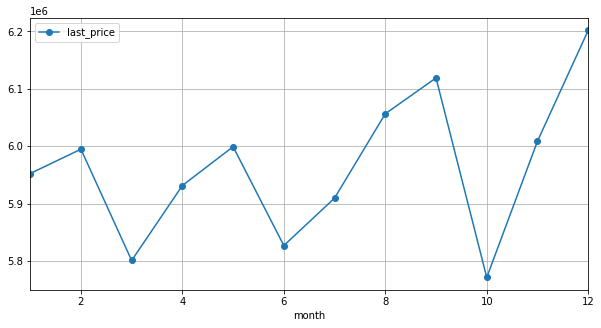

In [68]:
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

Самые дорогие квартиры публиковались в сентябре,самые дешевые в октябре.

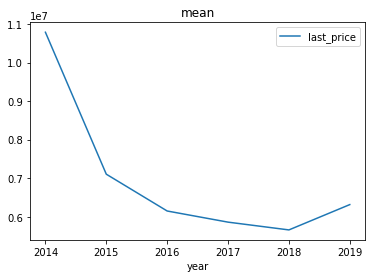

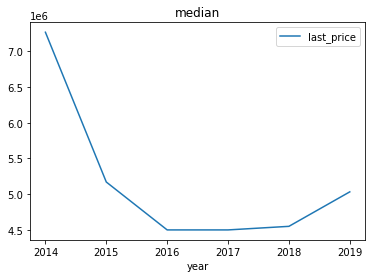

In [69]:
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

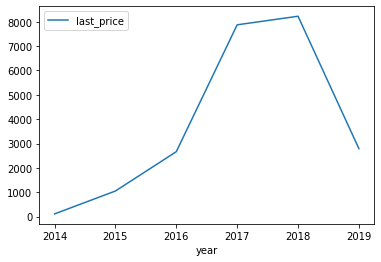

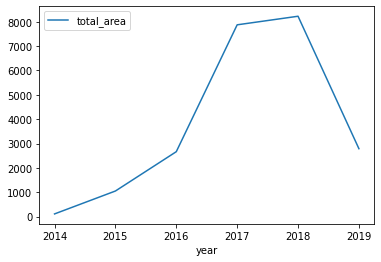

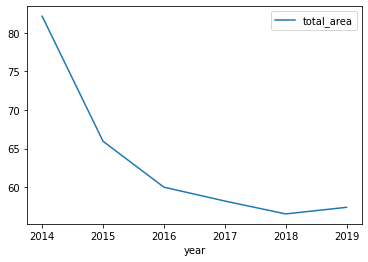

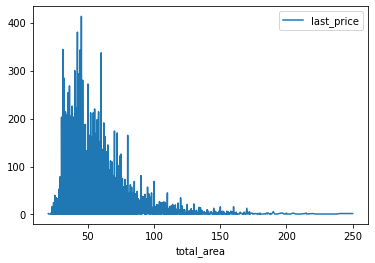

In [70]:
data.pivot_table(index='year',values='last_price',aggfunc='count').plot(y='last_price', kind='line');
data.pivot_table(index='year',values='total_area',aggfunc='count').plot(y='total_area', kind='line');
data.pivot_table(index='year',values='total_area',aggfunc='mean').plot(y='total_area', kind='line');
data.pivot_table(index='total_area',values='last_price',aggfunc='count').plot(y='last_price', kind='line');

### Считаем среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [71]:
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)#добавим столбец со средней ценой за квадратный метр
city_top = data['locality_name'].value_counts().head(10)#найдем самые популярные города и сохраним их в переменную



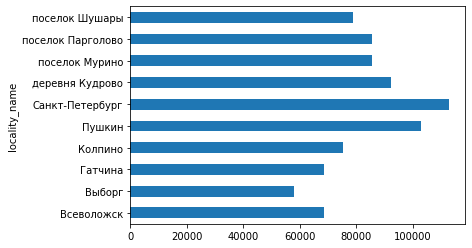

In [72]:
city_m_price = data.query('locality_name in (@city_top.index)').pivot_table(values='sm_price', index='locality_name')
city_m_price = city_m_price.astype(int)
city_m_price.sort_values('sm_price', ascending=False)#создаем сводную таблицу и сортируем по убыванию
city_m_price['sm_price'].plot(kind='barh');

Ожидаемо цена за квадратный метр выше всего в СПБ и ближайших к нему населенных пунктах.

### Как стоимость объектов зависит от расстояния до центра города СПБ

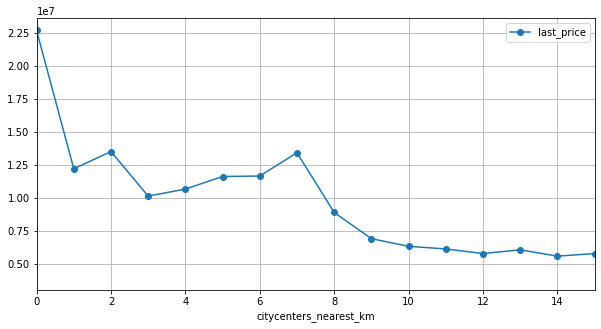

In [73]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='citycenters_nearest_km', values='last_price',aggfunc='mean')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

Исходя из графика видим, что малой удаленностью по отношению к цене считается до 8 км.
Центр соответственно дороже всех,далее цена снижается плавно.

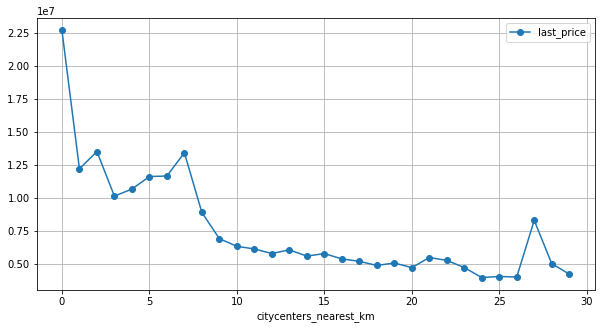

In [74]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='citycenters_nearest_km', values='last_price',aggfunc='mean')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

In [75]:
print(data.query('citycenters_nearest_km == 27 and locality_name == "Санкт-Петербург"')['last_price'])


748     14350000
5961     2250000
Name: last_price, dtype: int64


Выброс на 27 км связан с "элитностью" данных мест.
Пушкин и Красное село являются исторически привлекательными местами.


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22709 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22709 non-null  int64         
 1   last_price              22709 non-null  int64         
 2   total_area              22709 non-null  float64       
 3   first_day_exposition    22709 non-null  datetime64[ns]
 4   rooms                   22709 non-null  int64         
 5   ceiling_height          13983 non-null  float64       
 6   floors_total            22709 non-null  int64         
 7   living_area             20915 non-null  float64       
 8   floor                   22709 non-null  int64         
 9   is_apartment            22709 non-null  bool          
 10  studio                  22709 non-null  bool          
 11  open_plan               22709 non-null  bool          
 12  kitchen_area            22709 non-null  float6

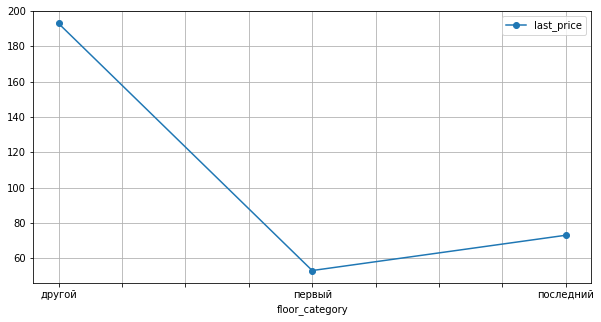

In [77]:
(
    data.query('citycenters_nearest_km == 3')
    .pivot_table(index='floor_category', values='last_price',aggfunc='count')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

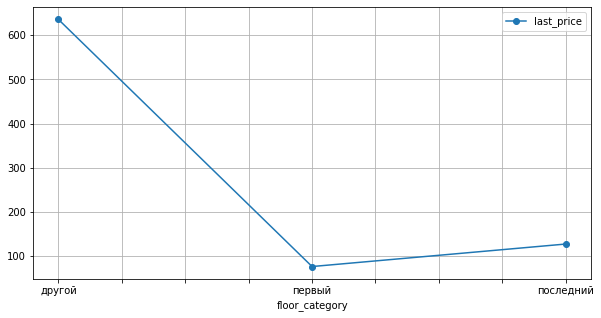

In [78]:
(
    data.query('citycenters_nearest_km == 5')
    .pivot_table(index='floor_category', values='last_price',aggfunc='count')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

Судя графикам выше ближе к центру стоимость последнего этажа равна,а то и выше стомости этажей ниже.
Первый же этаж так и остался самым низким по цене.Из-за этого и идет выброс.
Видимо в Питере реально круто на крышах)

In [79]:
centr_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']
centr_spb = centr_spb.loc[centr_spb['citycenters_nearest_km'] < 10]#оставляем квартиры удаленностью до 10 км(центр)
#centr_spb.head(10)
cost_km = centr_spb['last_price'].sum() / centr_spb['citycenters_nearest_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(cost_km))

Средняя цена для каждого километра составляет 1921694 ₽


Очень высокая цена для центра,посмотрим для большей удаленности до 20 км например.

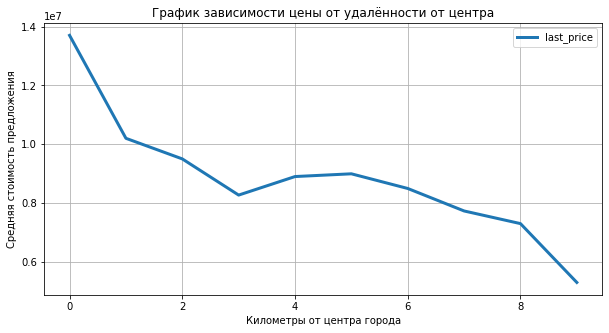

In [80]:
centr_spb.pivot_table(index='citycenters_nearest_km', values='last_price', aggfunc='median').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

На 3 километре от центра идет подьем цены,возможно связанный с элитными районами или достопримечательностями в данном районе.
После 5 км от центра историческая часть заканчивается и уже появляются жилые районы.

### Общий вывод

#### Срок продажи квартиры

Чаще всего квартиру продают за 90 дней. Если меньше 40 дней, то это быстро, если дольше 200 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

#### Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, число комнат, жилая площадь 
Первый этаж значительно дешевле остальных вариантов. 
Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
В центре стоимость последнего этажа равна,а то и больше по стоимости не первых этажей.

#### Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 114410 ,далее идут поселения входящие административно в СПБ.
Дешевле всего квадратный метр в Выборге - 58093

#### Как стоимость объектов зависит от расстояния до центра города СПБ

Удаленность от центра влияет на стоимость.
Средняя цена для каждого километра составляет 1889080 ₽ и прямопропорционально снижается по удаленности от центра.



